<a href="https://colab.research.google.com/github/reg4762/PembelajaranMesin_Ganjil_2024/blob/main/JobSheet4/JobSheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Job Sheet 4 Klasifikasi
## Nama     : Regita Delya Putri
## No. Absen: 21
## NIM      : 2241720137
## Kelas    : TI-3F

# PRAKTIKUM 1 (Klasifikasi SVM dengan Data Dummy)

In [42]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

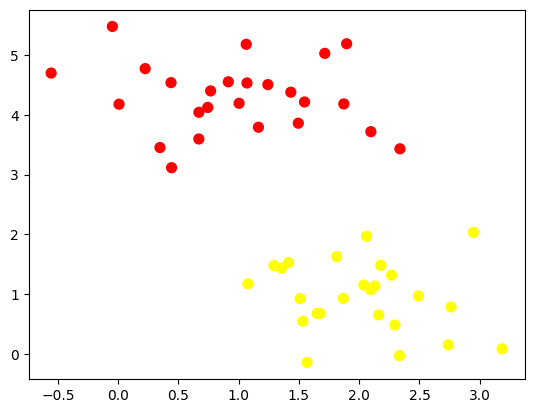

In [43]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60) # digunakan untuk menggenerate data dummy
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

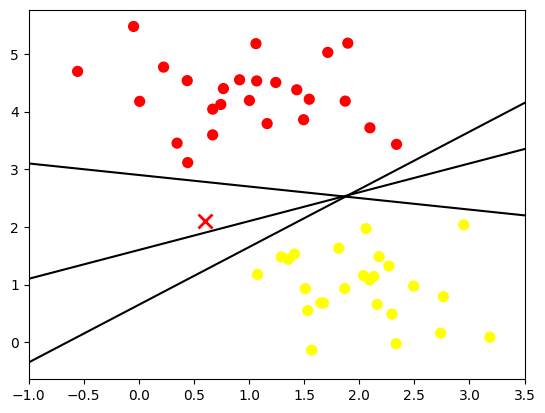

In [44]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

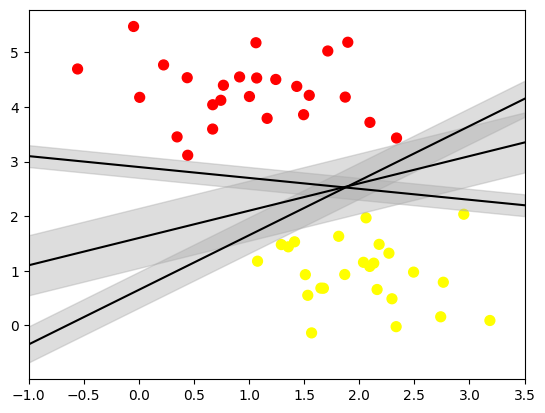

In [45]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Penerappan fitting SVM

In [46]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [47]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

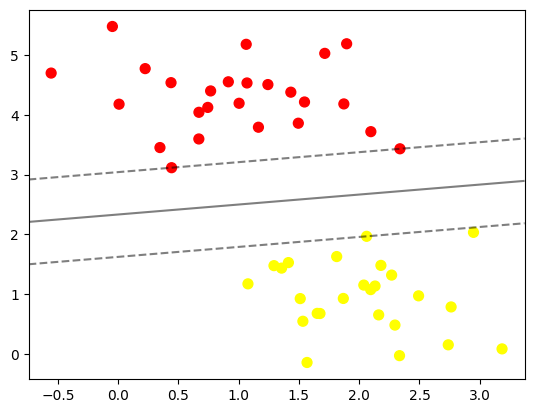

In [48]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [49]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

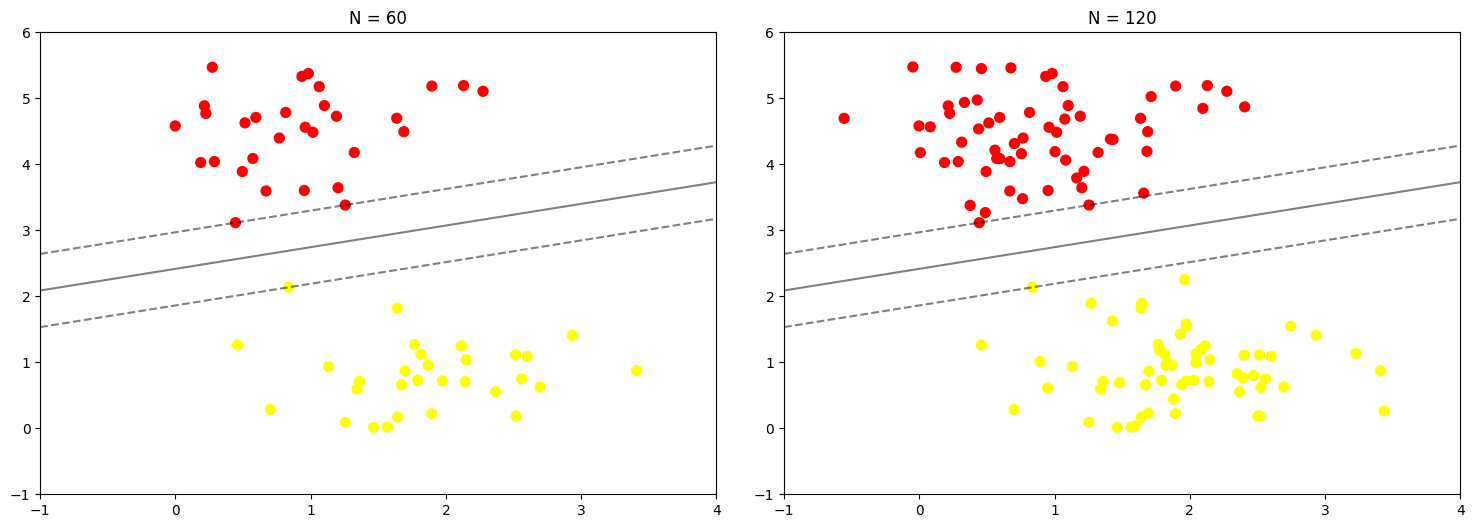

In [50]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Data Tidak Terpisah Secara Linier

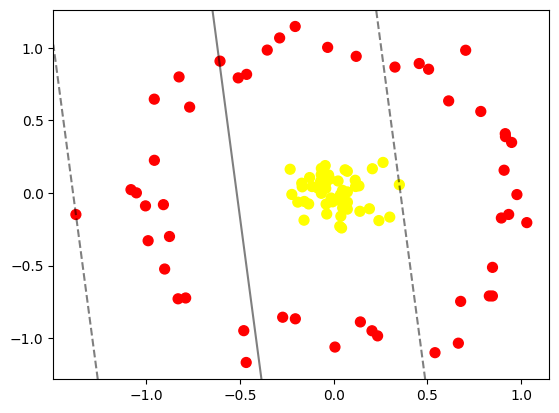

In [51]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [52]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=3, options=(-90, -75, 45, 30, 20, 10), value=30), Int…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-4.55197232e-02,  1.88549923e-01],
       [-1.15572350e-01,  4.40644281e-02],
       [-1.70651728e-01,  6.72896024e-02],
       [-4.26490047e-02,  3.13168015e-02],
       [ 8.94245053e-01, -1.72356860e-01],
       [-9.08676663e-01, -8.04205340e-02],
       [ 7.25258460e-02,  1.49260191e-01],
       [-4.64867208e-01,  8.16403973e-01],
       [-4.67030343e-01, -1.16690047e+00],
       [-1.37559625e+00, -1.48330800e-01],
       [ 1.19766021e-01,  9.40509659e-01],
       [-6.25482308e-03, -6.09490653e-02],
       [-2.75731686e-02,  1.23884309e-01],
       [ 9.33219163e-01, -1.47937396e-01],
       [ 6.13090752e-01,  6.33837614e-01],
       [ 4.65854396e-02,  1.79359490e-02],
       [-8.30393208e-01, -7.28589660e-01],
       [ 6.77059187e-01, -7.46353219e-01],
       [ 4.76817197e-02, -1.02363885e-01],
       [ 8.46386453e-01, -7.09161214e-01],
       [ 3.79084380e-02, -1.59670715e-01],
       [ 3.49994352e-01,  5.68205804e-02],
       [ 7.84506575e-01,  5.61056071e-01],
       [ 9.08819877e-01,  1.56568738e-01],
       [-2.72435778e-01, -8.55429543e-01],
       [ 9.15054833e-01,  4.08219517e-01],
       [-1.08173772e+00,  2.27961596e-02],
       [ 9.16083210e-01,  3.87608657e-01],
       [-6.99629928e-02,  8.07180202e-02],
       [-6.60802319e-02, -2.35287461e-03],
       [-1.41031683e-02, -3.50231211e-02],
       [ 5.05959408e-01,  8.51748295e-01],
       [-2.91018573e-02,  1.17611596e-01],
       [-8.50868248e-02,  3.38435005e-02],
       [-8.25230416e-01,  7.98792199e-01],
       [-7.89961390e-01, -7.22877599e-01],
       [ 2.04001753e-01, -9.48623013e-01],
       [-1.91823438e-01, -6.29900758e-02],
       [-7.68705724e-01,  5.91110576e-01],
       [-8.76251008e-01, -2.99688638e-01],
       [ 2.63044094e-01,  2.10227864e-01],
       [ 4.18245046e-02, -2.40950585e-01],
       [ 4.34140292e-02, -6.27212648e-02],
       [-2.32598614e-01,  1.63241048e-01],
       [-6.60789426e-02,  1.68751778e-01],
       [-3.24714995e-02,  1.00226464e+00],
       [ 5.40228394e-01, -1.09945858e+00],
       [ 1.16430416e-01,  4.45045831e-02],
       [ 8.46942126e-01, -5.12160819e-01],
       [ 3.26489196e-01,  8.66560643e-01],
       [-9.02034489e-01, -5.23634788e-01],
       [-4.08050312e-02, -7.68023433e-02],
       [-4.27755632e-02,  6.64751821e-02],
       [ 2.29967209e-02,  8.23140513e-02],
       [ 3.21572015e-02, -2.29855767e-01],
       [-5.09558132e-01,  7.92185971e-01],
       [ 1.42100051e-01, -8.87765160e-01],
       [ 2.33946315e-01, -9.83769957e-01],
       [-1.58591411e-01, -1.87320969e-01],
       [-9.57426080e-01,  6.45730601e-01],
       [-2.88627696e-01,  1.06728842e+00],
       [-1.33831082e-01, -7.56626202e-02],
       [-2.23590737e-01, -1.01676524e-02],
       [-1.68250060e-01,  4.23830406e-02],
       [ 6.48567727e-03, -1.06077348e+00],
       [-1.05293364e+00,  8.26317899e-04],
       [-4.79988895e-01, -9.47955984e-01],
       [-6.06709052e-01,  9.07496364e-01],
       [-9.56920095e-01,  2.24799157e-01],
       [-3.54777596e-01,  9.83587946e-01],
       [ 4.55980848e-01,  8.91040465e-01],
       [ 8.29957241e-01, -7.08977411e-01],
       [-5.57647805e-02,  3.62311556e-02],
       [ 6.64769582e-01, -1.03406086e+00],
       [-2.04839523e-01, -8.66256631e-01],
       [ 7.30331564e-02, -6.36128909e-02],
       [ 1.39573087e-01, -1.26238042e-01],
       [-1.28652484e-01,  1.06107096e-01],
       [-9.90235476e-01, -3.28665327e-01],
       [ 4.43826506e-02, -2.88057516e-02],
       [ 7.23072548e-02, -1.11338872e-01],
       [ 1.34426674e-01,  4.89457620e-02],
       [ 9.77175186e-01, -1.10150215e-02],
       [-1.00428204e+00, -8.88529521e-02],
       [ 2.40875919e-01, -1.90198154e-01],
       [ 3.59007633e-02, -1.12997191e-02],
       [ 2.05997369e-01,  1.66834063e-01],
       [ 6.05241324e-02,  1.59518711e-01],
       [-2.05663492e-01,  1.14608356e+00],
       [-1.56873635e-01, -5.84166064e-02],
       [ 2.98834082e-01, -1.66026479e-01],
       [ 1.14641530e-01,  8.74099779e-02

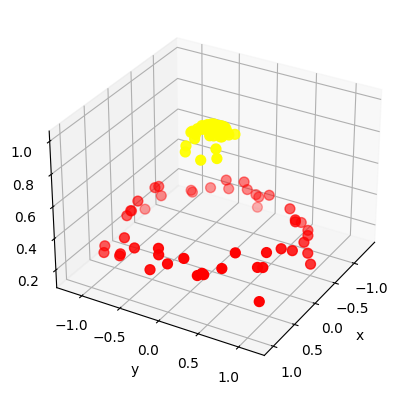

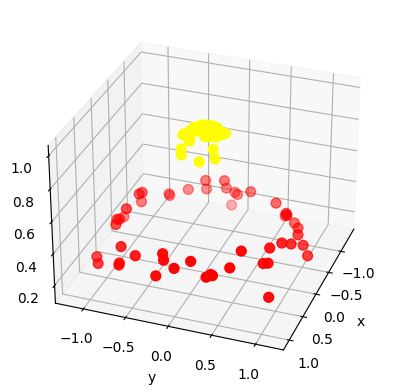

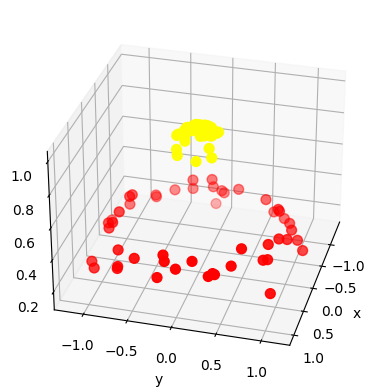

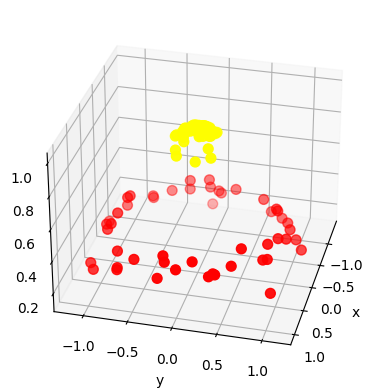

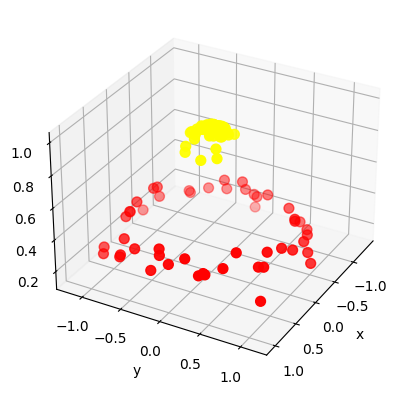

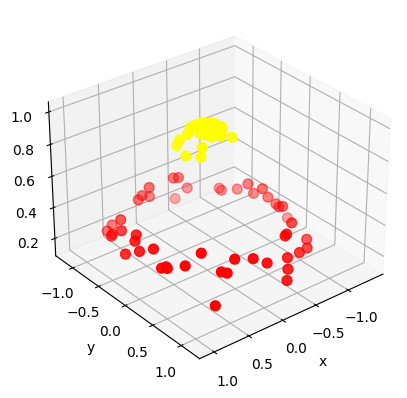

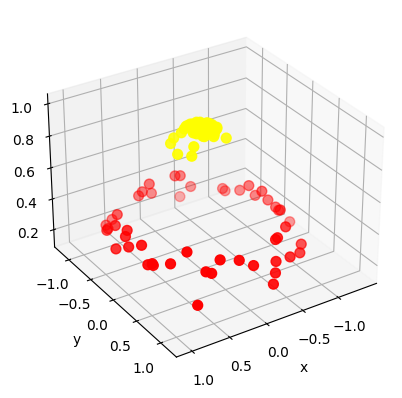

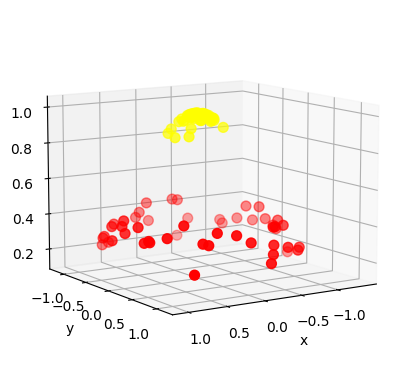

In [53]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, -75, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

In [21]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

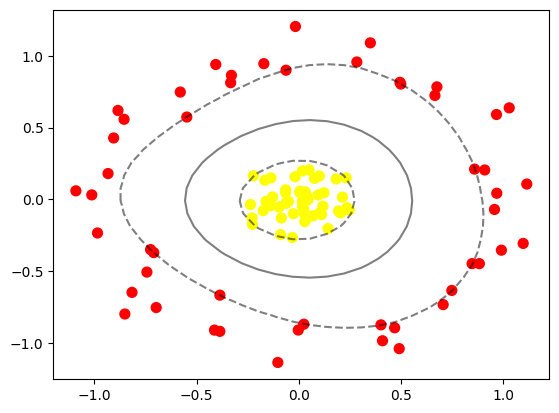

In [22]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

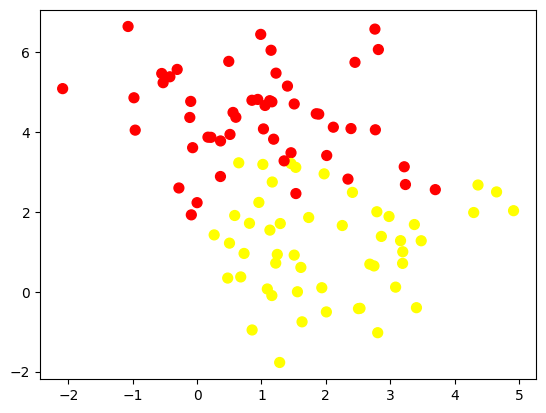

In [23]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

# jiaka overlap modifikasi buffernya

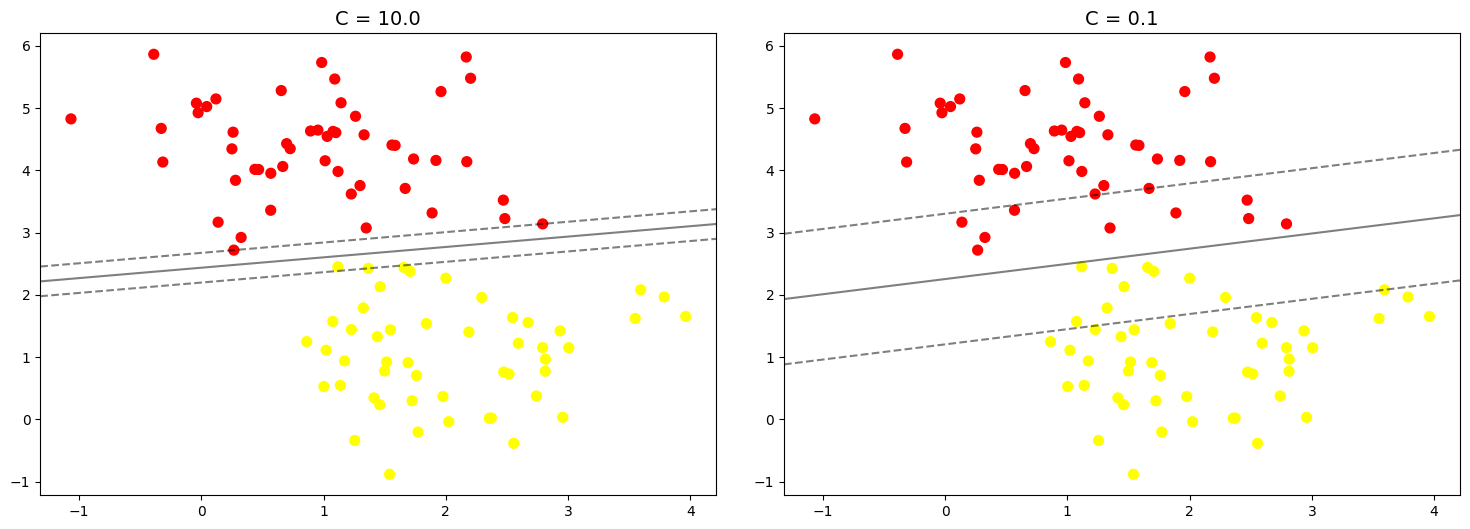

In [24]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# PRAKTIKUM 2 (Klasifikasi SVM Pada Data Citra)

In [60]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60) #60 gambar per orang
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


In [90]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [91]:
# dipakai vector
faces.data.shape

(1348, 2914)

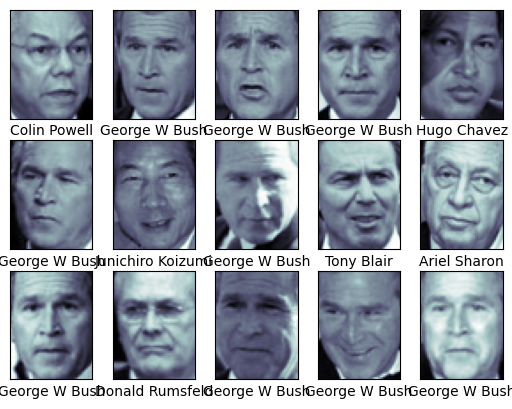

In [93]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [94]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA #principle components analysis
from sklearn.pipeline import make_pipeline #membuat pipeline ketika memasukkan data akan langsung memproses PCA dan SVC. Yang dimasukkan ke pipeline harus sebuah objek

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [95]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [102]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], #nyoba-nyoba
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1.78 s, sys: 590 ms, total: 2.37 s
Wall time: 35.7 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [66]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

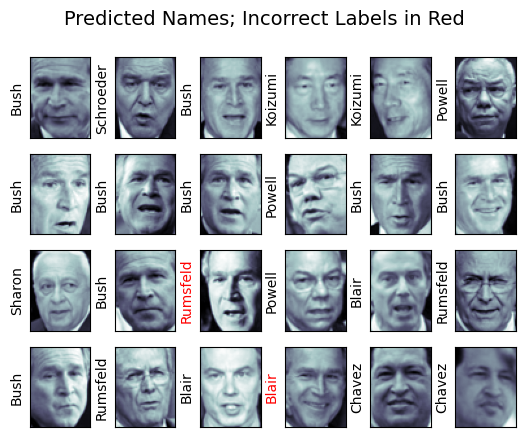

In [67]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

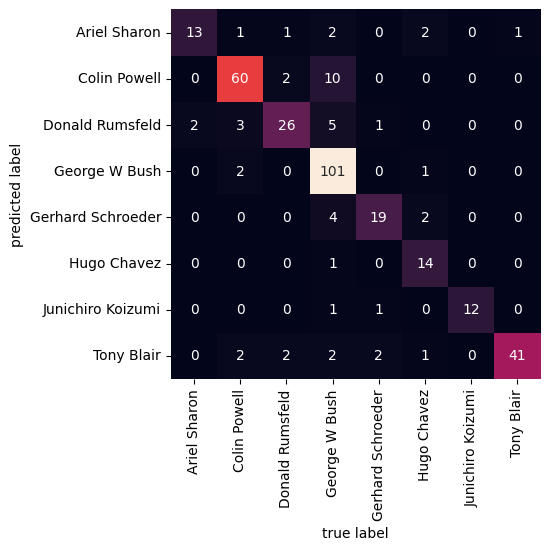

In [103]:
# bentuk confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# PRAKTIKUM 3 (Klasifikasi Naive Bayes dengan Data Dummy)

## Mendefiniskan Data Dummy

In [25]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 54  83]
 [103 110]
 [ 23  40]
 [113 117]
 [ 54  19]
 [131 136]
 [148 140]
 [ 91 159]
 [  9 173]
 [250  19]
 [140  73]
 [245  12]
 [200  24]
 [169  46]
 [198  26]
 [  2 178]
 [ 75 101]
 [ 93 118]
 [ 12 141]
 [227  71]
 [ 28  95]
 [134 112]
 [ 52 137]
 [ 87  46]
 [236 132]
 [112  35]
 [  4  39]
 [ 73  36]
 [109 156]
 [156 123]]
[0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


## (Opsional) Membuat Data Frame

In [26]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,54,83,0
1,103,110,0
2,23,40,0
3,113,117,0
4,54,19,1


In [27]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,54,83,Kelas B
1,103,110,Kelas B
2,23,40,Kelas B
3,113,117,Kelas B
4,54,19,Kelas A



## (Opsional) Visualisasi Data

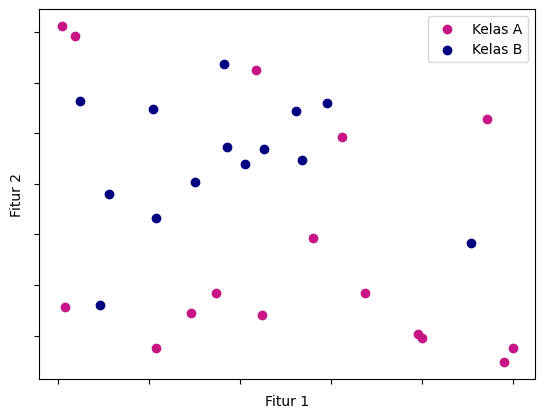

In [28]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

## Klasifikasi Multinomial Naive Bayes

In [29]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9047619047619048
Hasil akurasi data test: 0.5555555555555556


## Klasifikasi Gaussian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.8571428571428571
Hasil akurasi data test (Gaussian): 0.5555555555555556


# PRAKTIKUM 4 (Klasifikasi Naive Bayes Pada Data Multinomial)

## Load Data

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/week4/data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Pra Pengolahan Data

### Drop Kolom

In [2]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Ubah Nama Kolom V1 dan V2

In [3]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



### Inspeksi Data

In [4]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


### Encode Label

In [5]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."



### Memisahkan Fitur dengan Label

In [6]:
X = df['SMS'].values
y = df['Labels'].values

## Ekstraksi fitur

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [11]:
print(len(bow.get_feature_names_out())) # Use get_feature_names_out() instead of get_feature_names()
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


## Training dan Evaluasi Model

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


# PRAKTIKUM 5 (Klasifikasi Citra Siang dan Malam)

## Langkah 0 - Import Library

In [13]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [14]:
# Image directories
train_dir = "/content/drive/MyDrive/Pembelajaran Mesin/week4/data/images/images/training"
test_dir = "/content/drive/MyDrive/Pembelajaran Mesin/week4/data/images/images/test"

## Langkah 1 - Load Data dan Visualisasikan

In [15]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [16]:
# Load training data
train_img = load_dataset(train_dir)

In [17]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        [[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        [[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        ...,
 
        [[188, 118,  59],
         [155,  90,  36],
         [144,  91,  47],
         ...,
         [116,  62,  18],
         [116,  62,  18],
         [116,  62,  18]],
 
        [[165, 100,  46],
         [199, 141,  91],
         [153, 108,  69],
         ...,
         [116,  63,  21],
         [116,  63,  21],
         [115,  62,  20]],
 
        [[186, 125,  71],
         [255, 201, 154],
         [224, 180, 143],
         ...,
         [116,  63,  21],
  

In [18]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 38
(469, 640, 3)


In [19]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: day


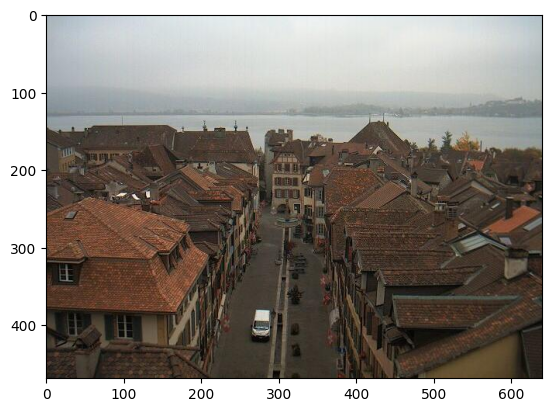

In [20]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

In [21]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [22]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [23]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [24]:
train_std_img_list = preprocess(train_img)

In [25]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 63
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


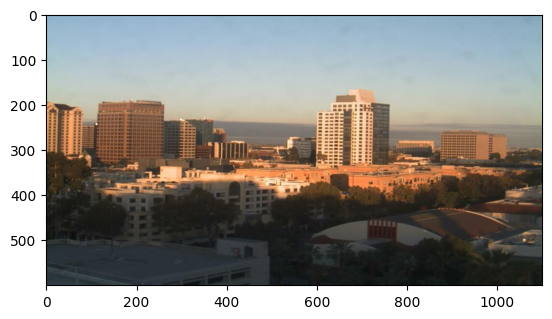

In [26]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur

In [56]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 162
Avg Brighness: 127.9982


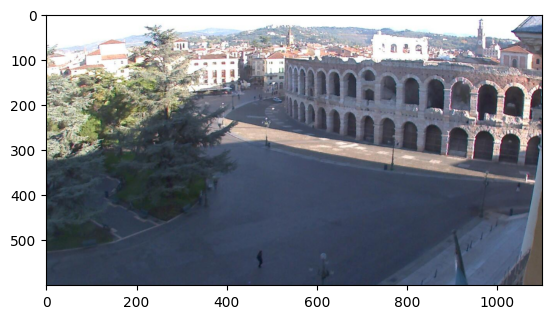

In [58]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

In [59]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 100
Actual label: 0
Predicted label: 0


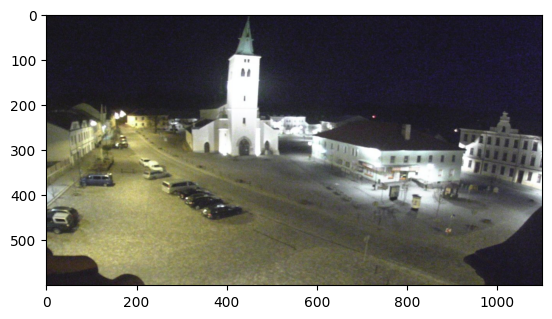

In [30]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi (Manual)

In [31]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [32]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [33]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Langkah 4 alternatif - Membuat Feature Vectors

In [34]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [35]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,114.884670,0.0
1,112.859553,0.0
2,14.534517,0.0
3,113.241642,0.0
4,114.386045,0.0


In [36]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,47.079873,0.0
1,8.217803,0.0
2,56.674038,0.0
3,98.980126,0.0
4,48.083733,0.0


## Langkah 5 alternatif

In [37]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

## Langkah 6 alternatif

In [38]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

## Langkah 0 - Import Library

In [70]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [71]:
# Image directories
train_dir = "/content/drive/MyDrive/Pembelajaran Mesin/week4/data/images/images/training"
test_dir = "/content/drive/MyDrive/Pembelajaran Mesin/week4/data/images/images/test"

## Langkah 1 - Load Data dan Visualisasikan

In [72]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [73]:
# Load training data
train_img = load_dataset(train_dir)

In [74]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        [[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        [[ 56,  36,  25],
         [ 56,  36,  25],
         [ 56,  36,  25],
         ...,
         [ 70,  44,  31],
         [ 70,  44,  31],
         [ 70,  44,  31]],
 
        ...,
 
        [[188, 118,  59],
         [155,  90,  36],
         [144,  91,  47],
         ...,
         [116,  62,  18],
         [116,  62,  18],
         [116,  62,  18]],
 
        [[165, 100,  46],
         [199, 141,  91],
         [153, 108,  69],
         ...,
         [116,  63,  21],
         [116,  63,  21],
         [115,  62,  20]],
 
        [[186, 125,  71],
         [255, 201, 154],
         [224, 180, 143],
         ...,
         [116,  63,  21],
  

In [75]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 51
(700, 1280, 3)


In [76]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: night


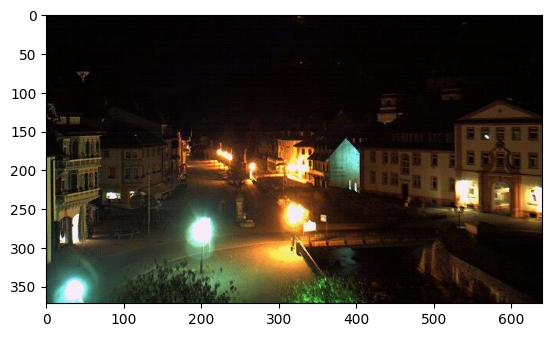

In [77]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

In [78]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [79]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [80]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [81]:
train_std_img_list = preprocess(train_img)

In [82]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 111
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


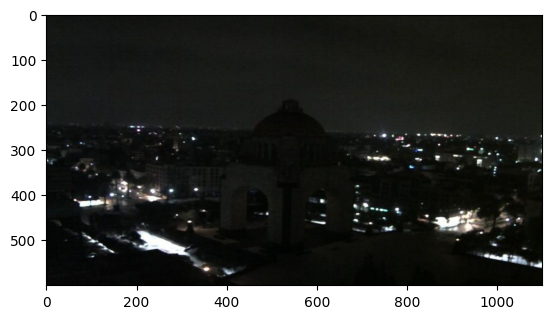

In [84]:
random_img_viz(train_std_img_list)

Image 104
Histogram shape: (512,)


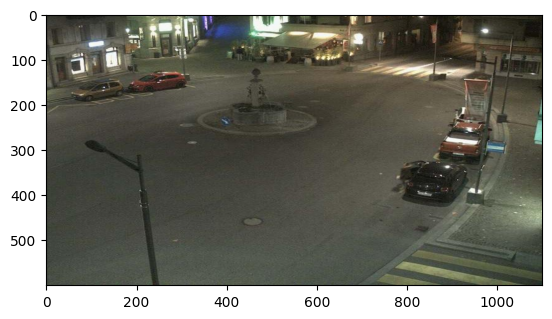

In [99]:
import matplotlib.pyplot as plt
import numpy as np
# Get feature based on histogram
def extract_histogram_feature(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the histogram
    hist = cv2.calcHist([img_hsv], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)

    # Flatten the histogram
    hist_flat = hist.flatten()

    return hist_flat
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

hist_flat = extract_histogram_feature(feature_img)

print(f'Image {rand_img}')
print(f'Histogram shape: {hist_flat.shape}')
plt.imshow(feature_img)


In [ ]:
# prompt: Buatlah model klasifikasi dengan menggunakan SVM

import pandas as pd
import numpy as np
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_hist_feature(img_list):
    hist_list = []
    labels = []

    for img in img_list:
        img_hist = extract_histogram_feature(img[0]) # Get the histogram from image
        img_label = img[1] # Get the image label

        hist_list.append(img_hist)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((hist_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data)

    return df
# Extract feature on train data
train_hist_img = extract_hist_feature(train_std_img_list)
print(f'Shape: {train_hist_img.shape}')
train_hist_img.head()
# Do the same thing on test data
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)
test_hist_img = extract_hist_feature(test_std_img_list)
print(f'Shape: {test_hist_img.shape}')
test_hist_img.head()
# ## Langkah 5 alternatif
# import requied library

# Split data and label
X_train = train_hist_img.iloc[:,:-1].values.tolist()
y_train = train_hist_img.iloc[:,-1]
X_test = test_hist_img.iloc[:,:-1].values.tolist()
y_test = test_hist_img.iloc[:,-1]

model = SVC()
model.fit(X_train, y_train)
# ## Langkah 6 alternatif

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')


## Langkah 4 alternatif - Membuat Feature Vectors

In [85]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [86]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,114.884670,0.0
1,112.859553,0.0
2,14.534517,0.0
3,113.241642,0.0
4,114.386045,0.0


In [87]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,47.079873,0.0
1,8.217803,0.0
2,56.674038,0.0
3,98.980126,0.0
4,48.083733,0.0


## Langkah 5 alternatif

In [88]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [89]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
